<a href="https://colab.research.google.com/github/xx39xx16/KWU-AI-Programming/blob/main/Homework-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

#데이터셋 읽기
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data_2023/dataset/winequality-red.csv')

print(df['quality'].unique())


In [ ]:
# 'quality' 열에 대한 원-핫 인코딩
y = pd.get_dummies(df['quality'])

# 'quality' 열을 제외한 나머지를 입력 데이터로 사용
X = df.drop('quality', axis=1)

# 데이터셋의 차원을 확인 (디버깅을 위해)
print(X.shape, y.shape)


(1599, 11) (1599, 6)


In [ ]:
# 데이터 정규화
# 성능 향상을 위해 정규화 부분을 추가해줌
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# train과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# k-폴드 교차 검증 설정
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1  # fold_no 변수 초기화
acc_per_fold = []

# KFold 교차 검증 수행
for train, val in kf.split(X_train, y_train):
    # 훈련 데이터와 검증 데이터 분할
    X_train_fold, X_val_fold = X_train[train], X_train[val]
    y_train_fold, y_val_fold = y_train.iloc[train], y_train.iloc[val]
    # 모델 구축
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train_fold.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train_fold.shape[1], activation='softmax'))
    model.summary()

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    # 체크포인트 및 얼리 스토핑 설정
    checkpointer = ModelCheckpoint('best_model_fold_{}.h5'.format(fold_no), save_best_only=True, monitor='val_loss', mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    # 모델 학습
    history = model.fit(X_train_fold, y_train_fold, epochs=370, batch_size=36, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping, checkpointer], verbose=1)

     # 성능 평가
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    acc_per_fold.append(scores[1] * 100)
    fold_no += 1

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                768       
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 6)                 198       
                                                                 
Total params: 3046 (11.90 KB)
Trainable params: 3046 (11.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/370
29/29 [==============================] - 1s 10ms/step - loss: 1.6207 - accuracy: 0.3245 - val_loss: 1.3963 - val_accuracy: 0.3594
Epoch 2/370
29/29 [==============================] - 0s 4ms/step - loss: 1.3053 - accuracy: 0.4409 - val_loss: 1.1828 - val_accuracy: 0.5508


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 4ms/step - loss: 1.2060 - accuracy: 0.4858 - val_loss: 1.1326 - val_accuracy: 0.5586
Epoch 4/370
29/29 [==============================] - 0s 4ms/step - loss: 1.1684 - accuracy: 0.5513 - val_loss: 1.1126 - val_accuracy: 0.6133
Epoch 5/370
29/29 [==============================] - 0s 4ms/step - loss: 1.1465 - accuracy: 0.5630 - val_loss: 1.0899 - val_accuracy: 0.6055
Epoch 6/370
29/29 [==============================] - 0s 4ms/step - loss: 1.1210 - accuracy: 0.5503 - val_loss: 1.0721 - val_accuracy: 0.6133
Epoch 7/370
29/29 [==============================] - 0s 5ms/step - loss: 1.0977 - accuracy: 0.5591 - val_loss: 1.0395 - val_accuracy: 0.6016
Epoch 8/370
29/29 [==============================] - 0s 3ms/step - loss: 1.0691 - accuracy: 0.5523 - val_loss: 1.0461 - val_accuracy: 0.5898
Epoch 9/370
29/29 [==============================] - 0s 5ms/step - loss: 1.0511 - accuracy: 0.5699 - val_loss: 1.0104 - val_accuracy: 0.6172
Epoch 10/370
29/29 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 5ms/step - loss: 1.1394 - accuracy: 0.5601 - val_loss: 1.1100 - val_accuracy: 0.5391
Epoch 4/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.5689 - val_loss: 1.0718 - val_accuracy: 0.5469
Epoch 5/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0669 - accuracy: 0.5709 - val_loss: 1.0381 - val_accuracy: 0.5703
Epoch 6/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0370 - accuracy: 0.5777 - val_loss: 1.0154 - val_accuracy: 0.5625
Epoch 7/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0169 - accuracy: 0.5865 - val_loss: 0.9896 - val_accuracy: 0.5898
Epoch 8/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0084 - accuracy: 0.5758 - val_loss: 0.9728 - val_accuracy: 0.6016
Epoch 9/370
29/29 [==============================] - 0s 4ms/step - loss: 0.9958 - accuracy: 0.5943 - val_loss: 0.9722 - val_accuracy: 0.5820
Epoch 10/370
29/29 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 4ms/step - loss: 1.1657 - accuracy: 0.5347 - val_loss: 1.1314 - val_accuracy: 0.5234
Epoch 4/370
29/29 [==============================] - 0s 4ms/step - loss: 1.1163 - accuracy: 0.5474 - val_loss: 1.0947 - val_accuracy: 0.5391
Epoch 5/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0767 - accuracy: 0.5572 - val_loss: 1.0653 - val_accuracy: 0.5625
Epoch 6/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0397 - accuracy: 0.5738 - val_loss: 1.0476 - val_accuracy: 0.5469
Epoch 7/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0168 - accuracy: 0.5797 - val_loss: 1.0346 - val_accuracy: 0.5469
Epoch 8/370
29/29 [==============================] - 0s 4ms/step - loss: 0.9979 - accuracy: 0.5611 - val_loss: 1.0232 - val_accuracy: 0.5820
Epoch 9/370
29/29 [==============================] - 0s 3ms/step - loss: 0.9844 - accuracy: 0.5904 - val_loss: 1.0320 - val_accuracy: 0.5898
Epoch 10/370
29/29 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 4ms/step - loss: 1.2105 - accuracy: 0.5024 - val_loss: 1.1956 - val_accuracy: 0.5547
Epoch 4/370
29/29 [==============================] - 0s 4ms/step - loss: 1.1268 - accuracy: 0.5513 - val_loss: 1.1388 - val_accuracy: 0.5352
Epoch 5/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0849 - accuracy: 0.5386 - val_loss: 1.0955 - val_accuracy: 0.5312
Epoch 6/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0504 - accuracy: 0.5572 - val_loss: 1.0603 - val_accuracy: 0.5508
Epoch 7/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0277 - accuracy: 0.5689 - val_loss: 1.0363 - val_accuracy: 0.5703
Epoch 8/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0089 - accuracy: 0.5640 - val_loss: 1.0219 - val_accuracy: 0.5781
Epoch 9/370
29/29 [==============================] - 0s 4ms/step - loss: 0.9993 - accuracy: 0.5806 - val_loss: 1.0151 - val_accuracy: 0.5742
Epoch 10/370
29/29 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 6ms/step - loss: 1.2300 - accuracy: 0.4590 - val_loss: 1.2089 - val_accuracy: 0.4471
Epoch 4/370
29/29 [==============================] - 0s 5ms/step - loss: 1.1516 - accuracy: 0.5332 - val_loss: 1.1610 - val_accuracy: 0.5412
Epoch 5/370
29/29 [==============================] - 0s 8ms/step - loss: 1.1172 - accuracy: 0.5459 - val_loss: 1.1300 - val_accuracy: 0.5373
Epoch 6/370
29/29 [==============================] - 0s 6ms/step - loss: 1.0859 - accuracy: 0.5781 - val_loss: 1.1242 - val_accuracy: 0.4706
Epoch 7/370
29/29 [==============================] - 0s 6ms/step - loss: 1.0637 - accuracy: 0.5586 - val_loss: 1.0846 - val_accuracy: 0.5216
Epoch 8/370
29/29 [==============================] - 0s 5ms/step - loss: 1.0350 - accuracy: 0.5762 - val_loss: 1.0667 - val_accuracy: 0.5255
Epoch 9/370
29/29 [==============================] - 0s 6ms/step - loss: 1.0153 - accuracy: 0.5811 - val_loss: 1.0486 - val_accuracy: 0.5412
Epoch 10/370
29/29 [=====

Average accuracy across all folds: 61.06%


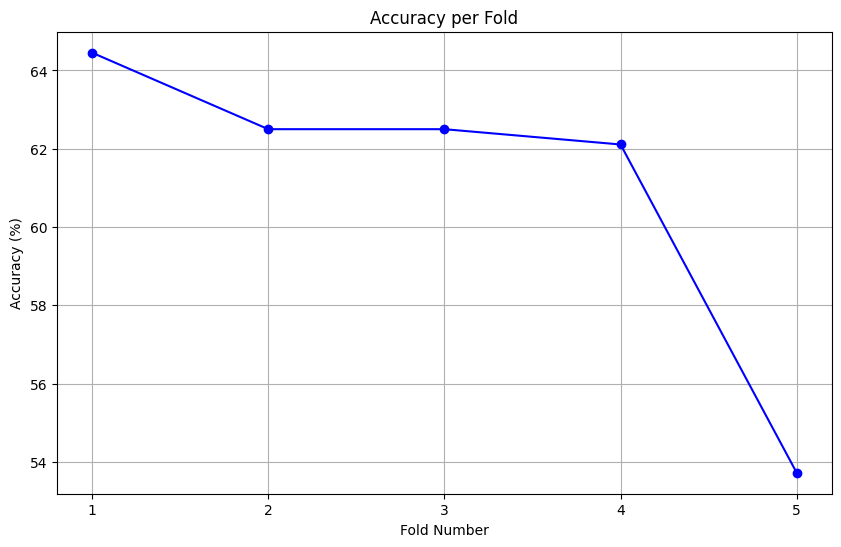

In [ ]:
# 교차 검증 결과 분석
average_accuracy = np.mean(acc_per_fold)
print(f'Average accuracy across all folds: {average_accuracy:.2f}%')

# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), acc_per_fold, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, k+1))
plt.grid(True)
plt.show()


In [ ]:
# 전체 데이터셋에 대한 모델 성능 평가
# 전체 데이터셋에 대해 동일한 모델 아키텍처를 사용하여 학습 및 평가를 수행합
model = Sequential()
model.add(Dense(64, input_shape=(X_scaled.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_scaled, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 1.4741 - accuracy: 0.4403
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 1.1669 - accuracy: 0.5210
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 1.0936 - accuracy: 0.5416
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.5616
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 1.0177 - accuracy: 0.5641
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.9950 - accuracy: 0.5922
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.9849 - accuracy: 0.5922
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.9771 - accuracy: 0.5979
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.9716 - accuracy: 0.5985
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.9655 - accuracy: 0.5972
Epoch 11/

In [ ]:
# 최종 테스트 세트에서 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Set Accuracy: {test_accuracy*100:.2f}%')

Test Set Accuracy: 61.87%
